In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
books = pd.read_csv('books.csv')
ratings = pd.read_csv('ratings.csv')
users = pd.read_csv('users.csv')

/var/folders/zt/12s0mgps6hl_1c1k2_r1f9n00000gp/T/ipykernel_17813/835546400.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('books.csv')


In [4]:
books['Image-URL-M'][1]

'http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg'

In [5]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [7]:
#dimension of dataset
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1048575, 3)
(278858, 3)


In [8]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [9]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [10]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [11]:
books.duplicated().sum()

0

In [12]:
ratings.duplicated().sum()

72

In [13]:
users.duplicated().sum()

0

## Popularity Based Recommender System

In [14]:
ratings_with_name = ratings.merge(books,on='ISBN')

In [15]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
230215,Ã?Â?l- Connection.,1
230216,Ã?Â?lpiraten.,2
230217,Ã?Â?rger mit Produkt X. Roman.,4
230218,Ã?Â?stlich der Berge.,2


In [16]:
avg_rating_df = ratings_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,Beyond IBM: Leadership Marketing and Finance ...,0.00
4,Clifford Visita El Hospital (Clifford El Gran...,0.00
...,...,...
230215,Ã?Â?l- Connection.,0.00
230216,Ã?Â?lpiraten.,0.00
230217,Ã?Â?rger mit Produkt X. Roman.,5.25
230218,Ã?Â?stlich der Berge.,4.00


In [17]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,Beyond IBM: Leadership Marketing and Finance ...,1,0.00
4,Clifford Visita El Hospital (Clifford El Gran...,1,0.00
...,...,...,...
230215,Ã?Â?l- Connection.,1,0.00
230216,Ã?Â?lpiraten.,2,0.00
230217,Ã?Â?rger mit Produkt X. Roman.,4,5.25
230218,Ã?Â?stlich der Berge.,2,4.00


In [18]:
popular_df = popular_df[popular_df['num_ratings'] >= 250].sort_values('avg_rating', ascending=False).head(50)

In [19]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

In [20]:
popular_df

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_rating
0,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,346,5.945087
2,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,380,5.884211
5,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,316,5.544304
9,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,501,5.177645
12,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,261,4.969349
13,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,519,4.938343
15,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,340,4.885294
24,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,463,4.684665
32,The Da Vinci Code,Dan Brown,http://images.amazon.com/images/P/0385504209.0...,828,4.679952
38,The Catcher in the Rye,J.D. Salinger,http://images.amazon.com/images/P/0316769487.0...,401,4.615960


## Collaborative Filtering Based Recommender System

In [21]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
padhe_likhe_users = x[x].index

In [22]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(padhe_likhe_users)]

In [23]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [24]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [25]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [26]:
pt.fillna(0,inplace=True)

In [27]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,249111,249628,249862,249894,250184,250405,250764,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
from sklearn.metrics.pairwise import cosine_similarity

In [29]:
similarity_scores = cosine_similarity(pt)

In [30]:
similarity_scores.shape

(603, 603)

In [31]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

In [32]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg']]

In [33]:
pt.index[545]

'The Winner'

In [34]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))

In [35]:
books.drop_duplicates('Book-Title')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271354,449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...
271356,525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [36]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))

In [37]:
import seaborn as sns

<AxesSubplot:xlabel='Age', ylabel='Count'>

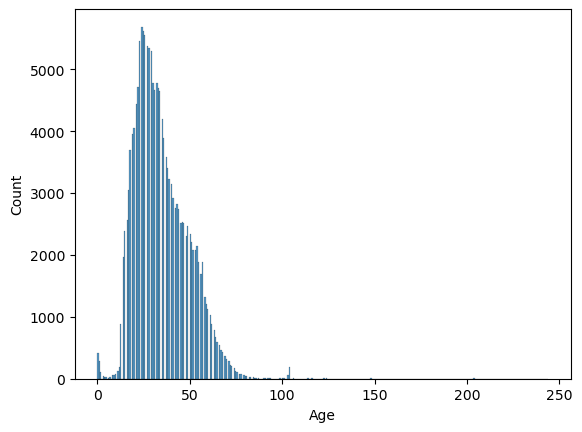

In [38]:
sns.histplot(users.Age)

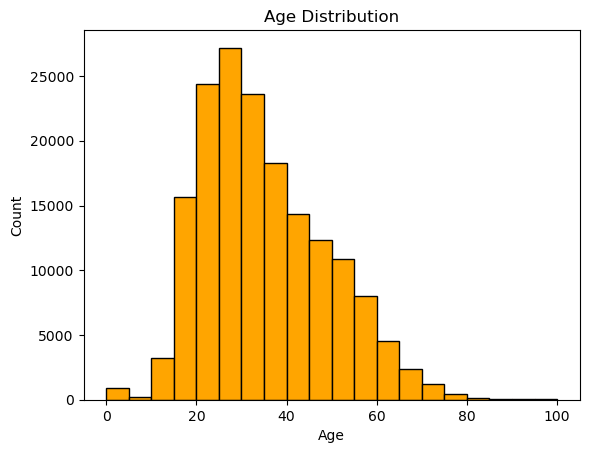

In [39]:
# Plotting the histogram
df = pd.DataFrame(users)
plt.hist(df['Age'], bins=20, range=(0, 100), edgecolor='black', color='orange')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

# Display the plot
plt.show()

        User-ID                            Location   Age         Country
0             1                  nyc, new york, usa   NaN             usa
1             2           stockton, california, usa  18.0             usa
2             3     moscow, yukon territory, russia   NaN          russia
3             4           porto, v.n.gaia, portugal  17.0        portugal
4             5  farnborough, hants, united kingdom   NaN  united kingdom
...         ...                                 ...   ...             ...
278853   278854               portland, oregon, usa   NaN             usa
278854   278855  tacoma, washington, united kingdom  50.0  united kingdom
278855   278856           brampton, ontario, canada   NaN          canada
278856   278857           knoxville, tennessee, usa   NaN             usa
278857   278858                dublin, n/a, ireland   NaN         ireland

[278858 rows x 4 columns]


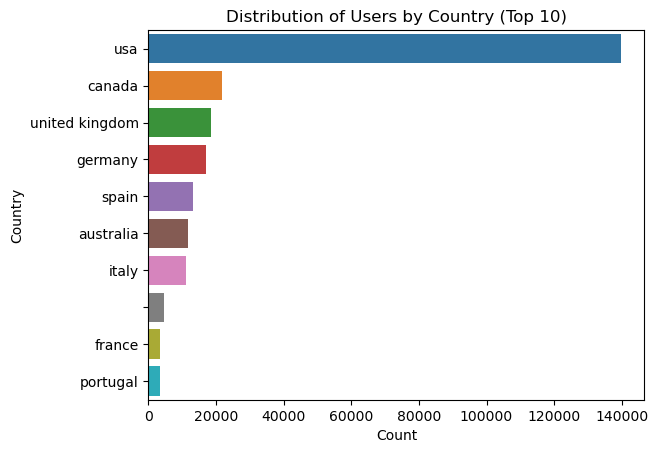

In [40]:
df['Country'] = df['Location'].str.split(',').str[-1].str.strip()

# Display the updated DataFrame
print(df)

# Get the top 10 countries by count in descending order
top_countries = df['Country'].value_counts().sort_values(ascending=False).head(10).index

# Filter the DataFrame to include only the top 10 countries
df_top_countries = df[df['Country'].isin(top_countries)]

# Plotting the horizontal countplot
sns.countplot(data=df_top_countries, y='Country', order=top_countries)

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Distribution of Users by Country (Top 10)')

# Display the plot
plt.show()

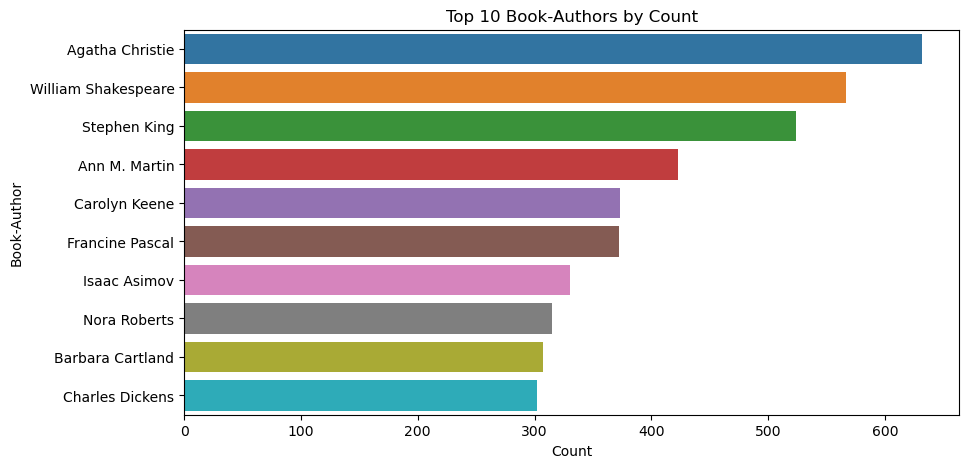

In [41]:
df = pd.DataFrame(books)
top_authors = df['Book-Author'].value_counts().head(10)

# Plotting the top 10 Book-Authors
plt.figure(figsize=(10, 5))
sns.barplot(x=top_authors.values, y=top_authors.index)
plt.xlabel('Count')
plt.ylabel('Book-Author')
plt.title('Top 10 Book-Authors by Count')
plt.show()

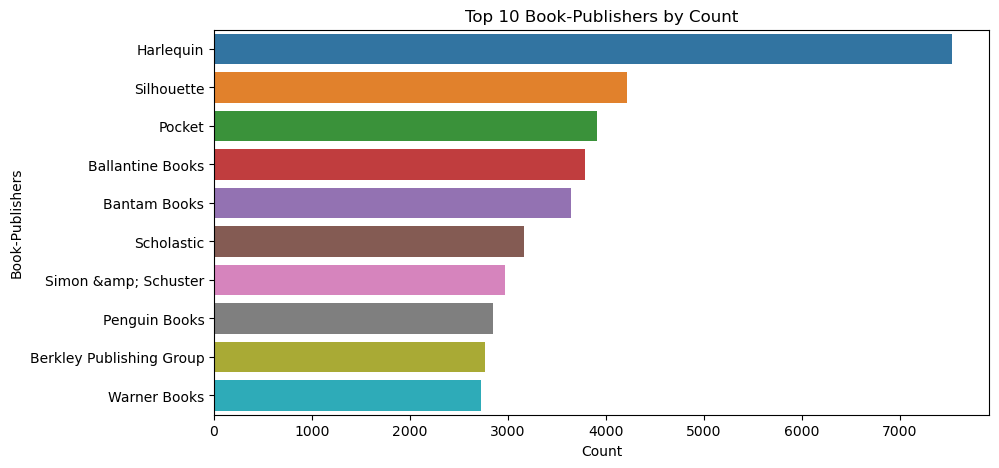

In [42]:
df = pd.DataFrame(books)
top_publishers = df['Publisher'].value_counts().head(10)

# Plotting the top 10 publisher
plt.figure(figsize=(10, 5))
sns.barplot(x=top_publishers.values, y=top_publishers.index)
plt.xlabel('Count')
plt.ylabel('Book-Publishers')
plt.title('Top 10 Book-Publishers by Count')
plt.show()

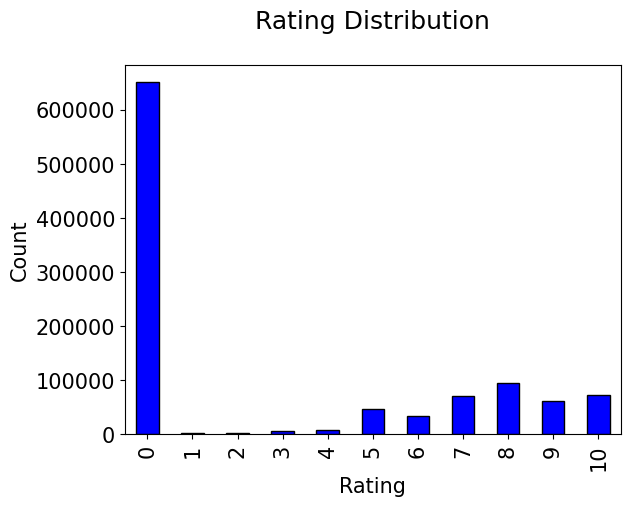

In [43]:
plt.rc("font", size=15)

# Plotting the bar chart in ascending order
ratings['Book-Rating'].value_counts(sort=False).sort_index().plot(kind='bar', edgecolor='black', color="blue")

# Adding title and labels
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')

# Display the plot
plt.show()

Text(0, 0.5, 'Count')

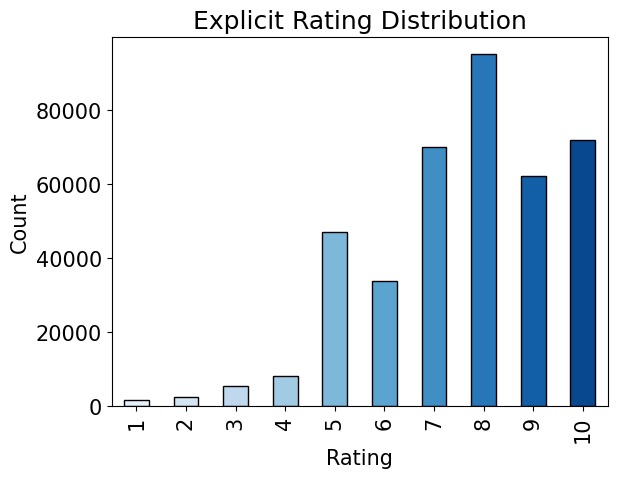

In [44]:
# Assuming you have a DataFrame named 'ratings' with a 'Book-Rating' column

# Segregating implicit and explicit ratings datasets
implicit_ratings = ratings[ratings['Book-Rating'] == 0]
explicit_ratings = ratings[ratings['Book-Rating'] != 0]

# Define a color palette
color_palette = sns.color_palette("Blues", len(explicit_ratings['Book-Rating'].unique()))

# Plotting the bar chart for the rating distribution in ascending order
plt.rc("font", size=15)
explicit_ratings['Book-Rating'].value_counts(sort=False).sort_index().plot(
    kind='bar', edgecolor='black', color=color_palette)

# Adding title and labels
plt.title('Explicit Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')


In [45]:
def missing_values(df):
    # Calculate the total number of values in each column
    total_values = df.shape[0]

    # Calculate the number of missing values in each column
    missing = df.isnull().sum()

    # Calculate the percentage of missing values in each column
    missing_percentage = (missing / total_values) * 100

    # Return the missing value percentages
    return missing_percentage

# Create a DataFrame
df = pd.DataFrame(users)  # Replace ... with your actual data

# Call the missing_values function
result = missing_values(df)

# Print the result
print(result)

User-ID      0.000000
Location     0.000000
Age         39.719857
Country      0.000000
dtype: float64


In [46]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

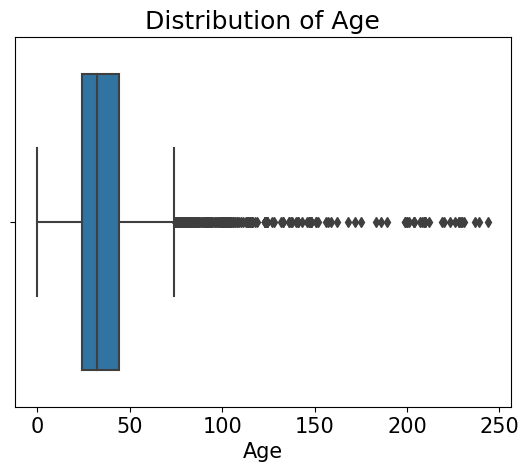

In [47]:
Users_df = pd.DataFrame(users)
sns.boxplot(data=Users_df, x='Age')

# Add a title to the plot
plt.title('Distribution of Age')

# Display the plot
plt.show()

In [48]:
#users.loc[(users.Age > 100) | (users.Age < 5), 'Age'] = np.nan

In [49]:
#users['Age'] = users['Age'].fillna(users.groupby('Country')['Age'].transform('median'))

In [50]:
# Assuming you have a DataFrame named 'Users_df' with 'Age' and 'Country' columns

# Calculate the median age by country
median_age_by_country = Users_df.groupby('Country')['Age'].median()

# Impute the missing values in 'Age' column with the median age of the corresponding country
Users_df['Age'] = Users_df.apply(
    lambda row: median_age_by_country[row['Country']] if pd.isnull(row['Age']) else row['Age'],
    axis=1
)

In [51]:
C= popular_df['avg_rating'].mean()
m= popular_df['num_ratings'].quantile(0.90)
Top_Books = popular_df.loc[popular_df['num_ratings'] >= m]
print(f'C={C} , m={m}')
Top_Books.shape

C=4.224302025049491 , m=598.9


(5, 5)